## AccelerateAI - Time Series Analysis and Forecasting

### Time Series Forecasting - Static & Dynamic Methods

In [1]:
import pandas as pd 

from statsmodels.tsa.seasonal import seasonal_decompose, STL

import matplotlib as mpl
mpl.rc("figure", figsize=(10,8))
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airpassenger = pd.read_csv("air_passenger.csv", parse_dates=True)
airpassenger.head()

,Date,DOMESTIC,INTERNATIONAL
0,Jan-03,43032450.0,9726436.0
1,Feb-03,41166780.0,8283372.0
2,Mar-03,49992700.0,9538653.0
3,Apr-03,47033260.0,8309305.0
4,May-03,49152352.0,8801873.0


### 1. Naive Forecast

In [16]:
airpassenger['Naive'] = airpassenger.DOMESTIC.shift(12)
airpassenger.head()

,Date,DOMESTIC,INTERNATIONAL,MA-12,Naive
0,Jan-03,43032450.0,9726436.0,NaN,NaN
1,Feb-03,41166780.0,8283372.0,NaN,NaN
2,Mar-03,49992700.0,9538653.0,NaN,NaN
3,Apr-03,47033260.0,8309305.0,NaN,NaN
4,May-03,49152352.0,8801873.0,NaN,NaN


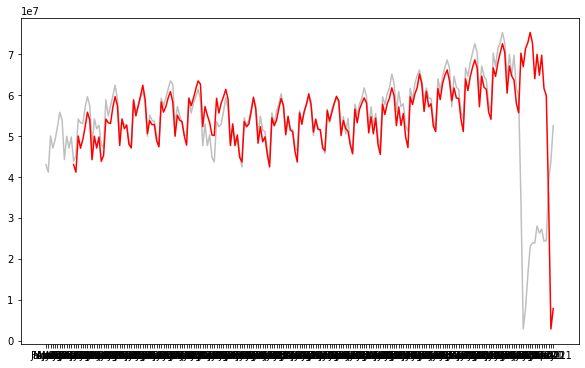

In [15]:
# How well does the naive forecast fit the data?
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(airpassenger.DOMESTIC, color='.5', alpha=.5)
ax.plot(airpassenger.Naive, color='r')

### 2. Moving Average

In [3]:
airpassenger['MA-12'] = airpassenger.DOMESTIC.rolling(12).mean()

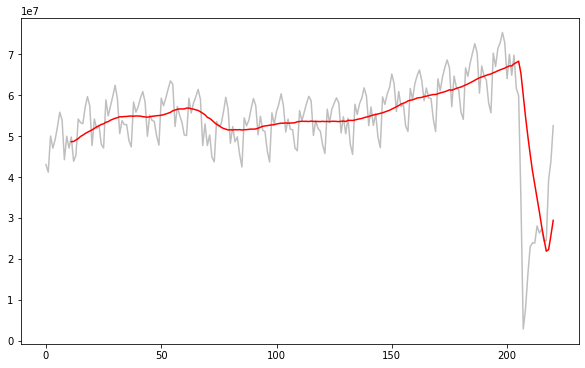

In [4]:
# How well does the MA-12 forecast fit the data?
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(airpassenger.DOMESTIC, color='.5', alpha=.5)
ax.plot(airpassenger["MA-12"], color='r')

### 3. Simple Exponential Smoothing, Holt Method & Holt Winter's Method

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing          # Simple 
from statsmodels.tsa.holtwinters import Holt                        # Holt's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing        # Holt Winter's Exponential Smoothing

In [6]:
SE_fit = SimpleExpSmoothing(airpassenger.DOMESTIC).fit() 
Holt_fit = Holt(airpassenger.DOMESTIC).fit() 
HoltWinter_fit = ExponentialSmoothing(airpassenger.DOMESTIC).fit()

C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


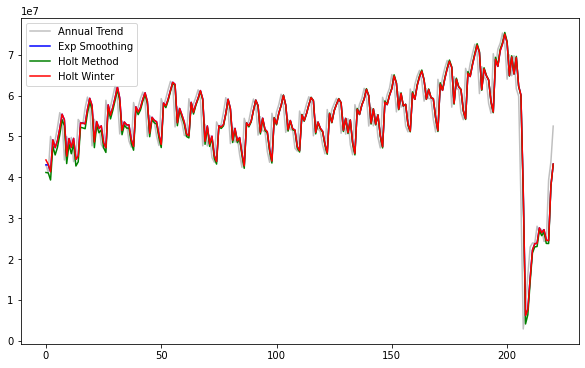

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(airpassenger.DOMESTIC, color='.5', alpha=.5, label='Annual Trend')
ax.plot(SE_fit.fittedvalues, color='b', label='Exp Smoothing')
ax.plot(Holt_fit.fittedvalues, color='g', label='Holt Method')
ax.plot(HoltWinter_fit.fittedvalues, color='r', label='Holt Winter ')
ax.legend()

In [9]:
fcast1 = SE_fit.forecast(12).rename("SES")
fcast2 = Holt_fit.forecast(12).rename("Holt's")
fcast3 = HoltWinter_fit.forecast(12).rename("Holt Winter's")

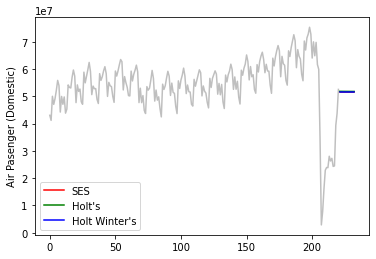

In [15]:
ax = airpassenger.DOMESTIC.plot(color='.5', alpha=.5)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)

ax.set_ylabel("Air Pasenger (Domestic)")
plt.show()

In [12]:
ax.plot(airpassenger.DOMESTIC, color='.5', alpha=.5)
plt.show()